/opt/anaconda3/envs/MCM_2025/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


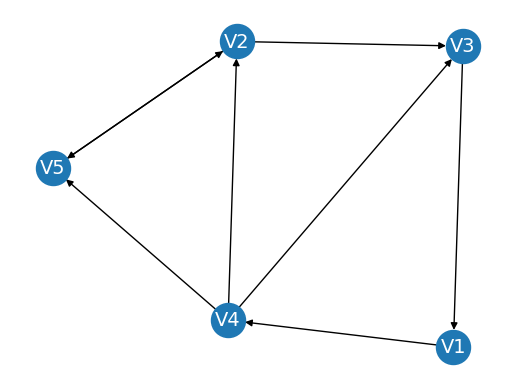

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

DG = nx.DiGraph()
DG.add_edges_from([('V1', 'V4'), ('V4', 'V3'), ('V4', 'V2'), ('V4', 'V5'), ('V5', 'V2'), ('V2', 'V5'), ('V2', 'V3'), ('V3', 'V1')])

plt.axis('off')
nx.draw_networkx(DG,
                 pos=nx.spring_layout(G, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )





特征向量中心度：
V1: 0.3556
V4: 0.2426
V3: 0.5211
V2: 0.5211
V5: 0.5211


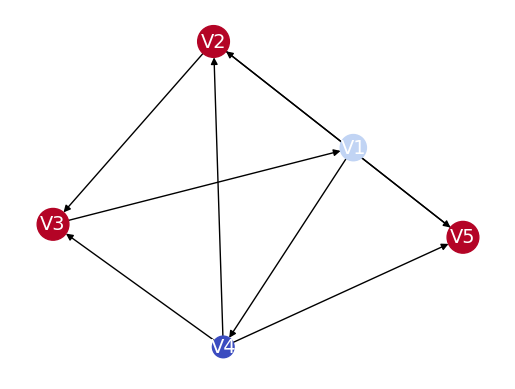

In [5]:
# 计算特征向量中心度
eigenvector_centrality = nx.eigenvector_centrality(DG)

# 打印特征向量中心度
print("特征向量中心度：")
for node, centrality in eigenvector_centrality.items():
    print(f"{node}: {centrality:.4f}")

# 如果需要，可以将特征向量中心度作为节点的大小或颜色来可视化
node_sizes = [1000 * eigenvector_centrality[node] for node in DG.nodes()]
node_colors = [eigenvector_centrality[node] for node in DG.nodes()]

plt.axis('off')
nx.draw_networkx(DG,
                 pos=nx.spring_layout(DG, seed=0),
                 node_size=node_sizes,
                 node_color=node_colors,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )
plt.show()

特征向量中心度：
V1: 0.4600
V4: 0.6742
V3: 0.3139
V2: 0.4007
V5: 0.2734


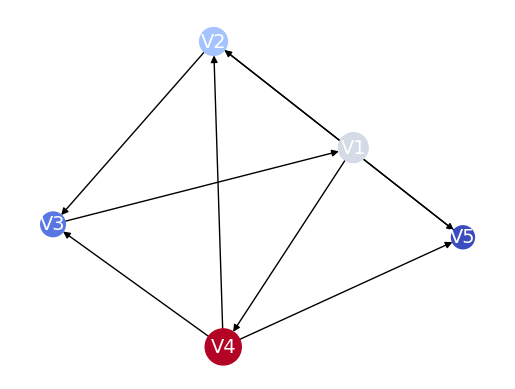

In [9]:
import numpy as np

# 获取邻接矩阵
A = nx.to_numpy_array(DG)

# 幂迭代法计算特征向量中心度
def power_iteration(A, max_iter=100, tol=1e-6):
    n = A.shape[0]
    x = np.random.rand(n)  # 随机初始化向量
    x = x / np.linalg.norm(x)  # 归一化
    for _ in range(max_iter):
        x_new = np.dot(A, x)
        x_new = x_new / np.linalg.norm(x_new)  # 归一化
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return x

# 计算特征向量中心度
eigenvector_centrality = power_iteration(A)

# 将特征向量中心度映射到节点
node_centrality = {node: centrality for node, centrality in zip(DG.nodes(), eigenvector_centrality)}

# 打印特征向量中心度
print("特征向量中心度：")
for node, centrality in node_centrality.items():
    print(f"{node}: {centrality:.4f}")

# 可视化特征向量中心度
node_sizes = [1000 * centrality for centrality in eigenvector_centrality]
node_colors = eigenvector_centrality

plt.axis('off')
nx.draw_networkx(DG,
                 pos=nx.spring_layout(DG, seed=0),
                 node_size=node_sizes,
                 node_color=node_colors,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )
plt.show()